In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np 
import pandas as pd 
import pickle 
import quandl 
from datetime import datetime
from selenium import webdriver
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#我只是import 爽的...

In [3]:
a="http://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0AH70&stname=%25E6%259D%25BE%25E5%25B1%25B1&datepicker=2019-03-31"
rw=list(a)

In [4]:
data=[]
for i in range(1,32):
    a=rw
    
    a[-2]=str(int(i/10))
    a[-1]=str(i%10)
    a=''.join(a)
    data.append(a)

取得松山測站三月份的全部觀測資料<br/>
做初步資料整理後  併入一個名為df的list裡面

In [5]:
df=[]
col_n = ['StnPres','Temperature','RH','WS','WD',]
for i in range(0,31):
    a=pd.read_html(data[i])
    a=a[1].dropna()
    a.columns=list(a.loc[2])
    a=a.drop(1)
    a=a.drop(2)
    a = pd.DataFrame(a,columns = col_n)
    a=a.reset_index(drop=True)
    
    df.append(a)

In [6]:
df[0].head()

,StnPres,Temperature,RH,WS,WD
0,1014.9,17.7,77,2.1,78
1,1015.0,17.7,79,1.9,75
2,1014.8,18.0,79,1.7,81
3,1014.8,18.0,79,1.8,83
4,1014.5,17.9,81,2.3,87


將資料轉換為Array準備進行訓練<br/>
其中有一日的資料有缺漏，故使用Try,Error來排除

In [7]:
npdf=[]
for i in range(31):
    a=np.array(df[i])
    #print(i)
    try:a=a.astype(np.float64)
    except ValueError:pass
    npdf.append(a)
npdf=np.array(npdf)

In [8]:
len(npdf)

31

In [9]:
c=[]
for i in range(31):
    a= '/' not in npdf[i]
    c.append(a)
npdf=npdf[c]

這個動作很精華<br/>
我將資料型態整理為可訓練的樣子

In [10]:
npdf=npdf.reshape(30,int(len(npdf.reshape(-1))/30))
len(npdf)

30

取得3/2~3/31中午12時的氣溫

In [11]:
TomorrowTempreture=[]
for i in range(1,31):
    TomorrowTempreture.append(df[i]['Temperature'][13])
TomorrowTempreture.append('16.6') #手動補上4月一號的溫度
TomorrowTempreture=np.array(TomorrowTempreture).reshape(-1,1)

In [12]:
TomorrowTempreture=[]
for i in range(1,31):
    TomorrowTempreture.append(df[i]['Temperature'][13])
TomorrowTempreture.append('16.6') #手動補上4月一號的溫度
TomorrowTempreture=np.array(TomorrowTempreture).reshape(-1,1)

In [13]:
d=[True]+c[0:-1]
TomorrowTempreture=TomorrowTempreture[d]
len(d)

31

In [14]:
npdf_train,npdf_test,TomorrowTempreture_train,TomorrowTempreture_test=train_test_split(npdf,TomorrowTempreture,test_size=0.3,random_state=9)

In [15]:
GoPredict=LinearRegression()

In [16]:
GoPredict.fit(npdf_train,TomorrowTempreture_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
#我還需要把npdf轉換成能訓練的格式，可能要把他一日的全部併成一個array

In [18]:
TomorrowTempreture_predict=GoPredict.predict(npdf_test)

In [19]:
npdf_test

array([[1008.3, 18.3, 87.0, ..., 69.0, 1.2, 75.0],
       [1014.6, 17.0, 69.0, ..., 77.0, 1.0, 290.0],
       [1012.7, 18.2, 81.0, ..., 85.0, 1.8, 79.0],
       ...,
       [1012.9, 20.0, 79.0, ..., 72.0, 0.6, 72.0],
       [1008.9, 24.2, 77.0, ..., 78.0, 0.7, 62.0],
       [1013.5, 15.7, 70.0, ..., 54.0, 0.6, 68.0]], dtype=object)

In [45]:
list(list(TomorrowTempreture_predict))

[array([39.27837762]),
 array([56.96336908]),
 array([24.58963568]),
 array([21.85493296]),
 array([34.60116711]),
 array([18.81445543]),
 array([26.3899559]),
 array([54.70611445]),
 array([31.47332177])]

In [21]:
TomorrowTempreture_test

array([['17.6'],
       ['20.0'],
       ['21.9'],
       ['19.2'],
       ['13.6'],
       ['24.8'],
       ['28.3'],
       ['29.0'],
       ['24.1']], dtype='<U4')

In [33]:
len(TomorrowTempreture_predict)

9

TypeError: only size-1 arrays can be converted to Python scalars

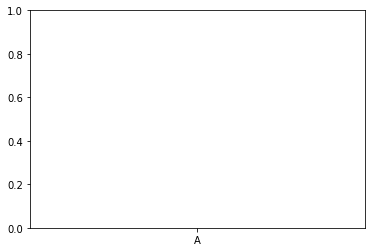

In [34]:
plt.bar(list('ABCDEFGHI'),TomorrowTempreture_predict)